In [2]:
import pandas as pd
data = pd.read_csv('bike.csv')

print(data)

         id  city  hour  is_workday  weather  temp_air  temp_body  wind    y
0         1     0    22           1        2       3.0        0.7     0   15
1         2     0    10           1        1      21.0       24.9     3   48
2         3     0     0           1        1      25.3       27.4     0   21
3         4     0     7           0        1      15.7       16.2     0   11
4         5     1    10           1        1      21.1       25.0     2   39
...     ...   ...   ...         ...      ...       ...        ...   ...  ...
9995   9996     0     4           0        2       8.3        7.3     0    2
9996   9997     1     5           0        1      22.3       22.2     0    1
9997   9998     1     0           0        1       9.6        9.7     0   11
9998   9999     0    18           0        2      27.4       29.7     1  105
9999  10000     0     9           1        2       3.2       -2.1     2   48

[10000 rows x 9 columns]


In [3]:
data=data.drop(['id'],axis=1)
print(data)

      city  hour  is_workday  weather  temp_air  temp_body  wind    y
0        0    22           1        2       3.0        0.7     0   15
1        0    10           1        1      21.0       24.9     3   48
2        0     0           1        1      25.3       27.4     0   21
3        0     7           0        1      15.7       16.2     0   11
4        1    10           1        1      21.1       25.0     2   39
...    ...   ...         ...      ...       ...        ...   ...  ...
9995     0     4           0        2       8.3        7.3     0    2
9996     1     5           0        1      22.3       22.2     0    1
9997     1     0           0        1       9.6        9.7     0   11
9998     0    18           0        2      27.4       29.7     1  105
9999     0     9           1        2       3.2       -2.1     2   48

[10000 rows x 8 columns]


In [4]:
data1=data
lenn=len(data['city'])
for i in range(0,lenn):
    if data1['city'][lenn-1-i]==0:
        data1=data1.drop([lenn-1-i],axis=0)
data1=data1.drop(['city'],axis=1)

print(data1)

      hour  is_workday  weather  temp_air  temp_body  wind    y
4       10           1        1      21.1       25.0     2   39
5        0           1        1      20.4       18.2     0   12
9        4           1        3      17.4       18.0     3    2
10       0           1        1      14.9       15.3     2    6
11       8           0        1      25.0       28.1     0   25
...    ...         ...      ...       ...        ...   ...  ...
9990    23           1        2      19.2       19.9     1   44
9991    19           1        1      25.1       26.2     2  124
9993     5           1        3      13.7       14.1     2    1
9996     5           0        1      22.3       22.2     0    1
9997     0           0        1       9.6        9.7     0   11

[4998 rows x 7 columns]


In [5]:
data1.loc[data1['hour']<6,'hour']=0
data1.loc[data1['hour']>18,'hour']=0
data1.loc[data1['hour']>=6,'hour']=1

print(data1)

      hour  is_workday  weather  temp_air  temp_body  wind    y
4        1           1        1      21.1       25.0     2   39
5        0           1        1      20.4       18.2     0   12
9        0           1        3      17.4       18.0     3    2
10       0           1        1      14.9       15.3     2    6
11       1           0        1      25.0       28.1     0   25
...    ...         ...      ...       ...        ...   ...  ...
9990     0           1        2      19.2       19.9     1   44
9991     0           1        1      25.1       26.2     2  124
9993     0           1        3      13.7       14.1     2    1
9996     0           0        1      22.3       22.2     0    1
9997     0           0        1       9.6        9.7     0   11

[4998 rows x 7 columns]


In [6]:
import numpy as np
yy=np.array(data1['y'])

print(yy)

data1=data1.drop(['y'],axis=1)

print(data1)

[39 12  2 ...  1  1 11]
      hour  is_workday  weather  temp_air  temp_body  wind
4        1           1        1      21.1       25.0     2
5        0           1        1      20.4       18.2     0
9        0           1        3      17.4       18.0     3
10       0           1        1      14.9       15.3     2
11       1           0        1      25.0       28.1     0
...    ...         ...      ...       ...        ...   ...
9990     0           1        2      19.2       19.9     1
9991     0           1        1      25.1       26.2     2
9993     0           1        3      13.7       14.1     2
9996     0           0        1      22.3       22.2     0
9997     0           0        1       9.6        9.7     0

[4998 rows x 6 columns]


In [7]:
data2=np.array(data1)
print(data2)

[[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 ...
 [ 0.   1.   3.  13.7 14.1  2. ]
 [ 0.   0.   1.  22.3 22.2  0. ]
 [ 0.   0.   1.   9.6  9.7  0. ]]


In [10]:
train=data2[:3999]
test=data2[3999:]

trainy=yy[:3999]
testy=yy[3999:]

In [11]:
train_n = train / train.max(axis=0)
test_n = test / test.max(axis=0)
trainy_n = trainy / trainy.max(axis=0)
testy_n = testy / testy.max(axis=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_n,trainy_n)

LinearRegression()

In [15]:
y_pred=regressor.predict(test_n)

In [16]:
rss=((testy_n-y_pred)**2).sum()
mse=np.mean((testy_n-y_pred)**2)
print(np.sqrt(np.mean((testy_n-y_pred)**2)))

0.17767953164215022


In [23]:
from sklearn import  datasets
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
import numpy as np
data=datasets.load_iris()
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [24]:
key=data.keys()
sample=data['data']
print(sample)
target=data['target']
print(target)
b={0:'setosa',1:'versicolor',2:'virginica'}

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [25]:
traindata,testdata,traintarget,testtarget = train_test_split(sample,target,test_size=0.8,random_state=42)
print(traindata.shape)
print(testdata.shape)

(30, 4)
(120, 4)


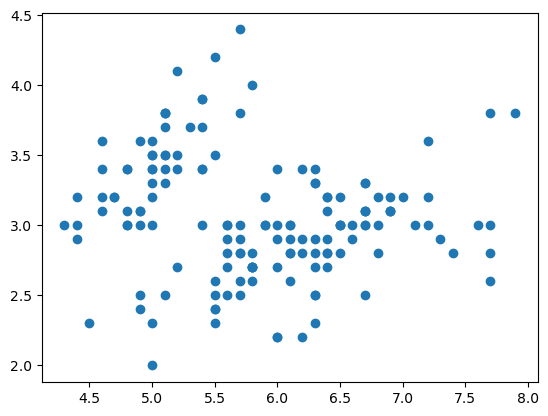

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
fe = pd.DataFrame(data['data'], columns=['sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width'])
plt.scatter(fe['sepal_length'],fe['sepal_width'])
plt.show()

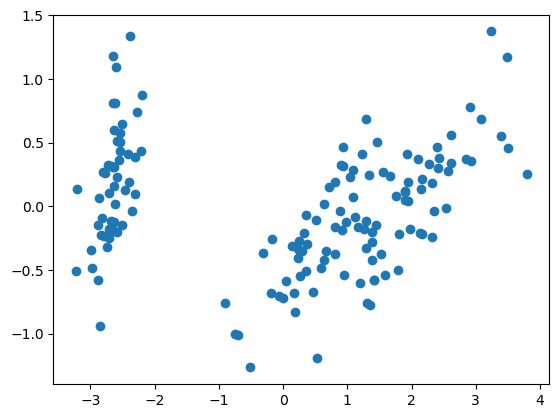

In [27]:
import pandas as pd
import numpy as np
 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
df_iris.head()
pca = PCA(n_components=2)
pca.fit(df_iris)
reduced = pca.fit_transform(df_iris)
fe = pd.DataFrame(reduced, columns=['1','2'])
plt.scatter(fe['1'],fe['2'])
plt.show()

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(traindata,traintarget)

KNeighborsClassifier()

In [29]:
result=knn.predict(testdata)
print(result)
print(testtarget)

lenn=len(result)
x=0
for i in range(0,lenn):
    if result[i]==testtarget[i]:
        x+=1
print(x/lenn)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 1 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 2 2 2 1 0 0 1 2 0 0 0 1 2 0 2 2 0 1 1
 1 1 2 0 2 1 2 1 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1]
0.9666666666666667
